# Search: Solving a Maze Using a Goal-based Agent

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [50]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [51]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

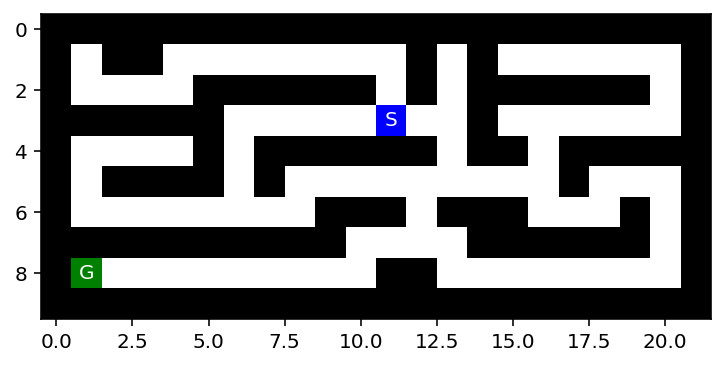

In [52]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [53]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [54]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /home/michael/code/classes/CS7320-AI/Search/maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [55]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

### Your answer goes here
- Initial State: Complete maze, with the agent location at the start location S.
- Actions: The Agent can move to one adjacent space in the grid, for a total of 4 actions: {North, South, East, or West}.
- Transition Model: Previous State -> Complete maze, with the agent's location one adjacent space North, South, East, or West away from its location in the previous state.
- Goal State: Complete maze, with the agent location at the goal location G.
- Path Cost: 1 for a single movement between two adjacent spaces. 

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determine these values for a given maze.

### Your answer goes here

* $n$: state space size - In a maze of size $x*y$ -- state space size is bounded by $2^{xy} + 2xy$ Each space can either be an empty space or a wall. PLUS One space will have a goal node, and one space will have a start node.
* $d$: depth of the optimal solution - Running an optimal algorithm such as BFS will return $d$. $d$ is the path cost of the optimal path from the start node to the goal node.
* $m$: maximum depth of tree - Determine the longest path from the starting node to any "dead-end" node, or the goal nodes. The path cost of the longest path will return $m$.
* $b$: maximum branching factor - Maximum branching factor is the number of adjacent tiles you can move to from a given node. In all the mazes we're working with, that would be 4 (one time north, one tile west, one tile south, or one tile east).

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

### Implementation of BFS

This BFS implementation uses a Python Queue to maintain all the nodes in the frontier.

The `expand` helper function creates new adjacenty nodes and appends them to a list that the main BFS function will then iterate through when adding new nodes to both `reached` and `frontier`. Only nodes that aren't walls will be added to this list.

This implementation also keeps track of five metrics while rujnning the algorithm:
- Path Cost of the final path from start to goal.
- Number of nodes expanded (based on the `expand` function)
- Max Tree Depth (of `reached`).
- Max Nodes in Memory (i.e. number of nodes in the `reached` structure)
- Max size of `frontier`.

In [56]:
from queue import Queue
from queue import LifoQueue

# ---------------------------------------
# Expand function for expanding the frontier. 
# Create and return all expanded child nodes.
# ---------------------------------------
def expand(maze, node, cost = 1):
    

    expanded_nodes = []
    actions = ['W','S','E','N']
    offsets = [(0,-1),(1,0),(0,1),(-1,0)]

    curr_pos = node.pos

    # Look in all 4 directions adjacent to the node's position. 
    # If it's not a wall, create a new node and add it to the list of expanded nodes.
    for i in range(4):
        curr_pos = (node.pos[0] + offsets[i][0], node.pos[1] + offsets[i][1])
        # If we're not looking at a wall...
        if (mh.look(maze,curr_pos) != 'X'):
            expanded_node = Node(curr_pos,node,actions[i],cost)
            expanded_nodes.append(expanded_node)

    return expanded_nodes

# ---------------------------------------
# Implementation of Breadth-first search. 
# Returns the OPTIMAL path to the goal from the start node.
# ---------------------------------------
def bfs(maze):
    
    # Defining all the metrics we'll be keeping track of. Return all of them when we find the goal.
    path_cost = 0
    num_nodes_expanded = 0
    max_tree_depth = 0
    max_nodes_in_memory = 0
    max_frontier_size = 0

    # Constant: PATH_COST = 1. Not a weighted search.
    PATH_COST = 1

    # Define current node, starting at the root.
    node = Node(mh.find_pos(maze, what= "S"), None, None, PATH_COST)

    # Define reached and frontier data structures.
    reached = [node.pos]
    frontier = Queue()
    frontier.put(node)

    while not frontier.empty():
        max_frontier_size = max(max_frontier_size, frontier.qsize()) # UPDATE METRIC
        node = frontier.get()

        num_nodes_expanded += len(expand(maze,node)) # UPDATE METRIC
        for child in expand(maze, node):
            max_tree_depth = max(max_tree_depth, len(child.get_path_from_root())) # UPDATE METRIC
            # If we have reached the goal (tile state == 'G'), then we're done. 
            # Return the path to this node from the root.
            if (mh.look(maze,child.pos) == 'G'):
                path_cost = len(child.get_path_from_root()) # UPDATE METRIC
                return (child, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size)
            if (child.pos not in reached):
                max_nodes_in_memory += 1 # UPDATE METRIC
                reached.append(child.pos)
                frontier.put(child)

    # If we didn't find the goal, then return None (reports failure).
    return (None, 0, 0, 0, 0, 0)

### Implementation of DFS

This DFS implementation uses a Python LifoQueue to maintain all the nodes in the frontier.

The `expand` helper function is used in this implementation; implemented above (in BFS Code).

The `node_creates_cycle` helper function determines whether the current path stored by DFS creates a cycle. If the function returns true, then we stop expanding from that node, forcing a backtrack until we can create a new path.

This implementation also keeps track of five metrics while rujnning the algorithm:
- Path Cost of the final path from start to goal.
- Number of nodes expanded (based on the `expand` function)
- Max Tree Depth (of `reached`).
- Max Nodes in Memory (i.e. number of nodes in the `reached` structure)
- Max size of `frontier`.

*NOTE: Max Nodes in Memory is recorded as 0 since there is no `reached` data structure. In this search, the "Max number of nodes in memory" will always be the max size of the `frontier` data structure.*

In [57]:
# ---------------------------------------
# Helper function for DFS. 
# Returns true if node is NOT part of a cycle.
# ---------------------------------------
def node_creates_cycle(node):
    
    node_pos = node.pos
    curr_node = node.parent

    # If any one of the node's parents 
    # has the same position as the node,
    # then there's a cycle.
    while (curr_node is not None):
        if (curr_node.pos == node_pos):
            return True
        curr_node = curr_node.parent

    return False

# ---------------------------------------
# Implementation of Depth-first search. 
# Returns the first path to the goal 
# that it finds from the start node.
# ---------------------------------------
def dfs(maze, depth_limit = -1):
    
    # Defining all the metrics we'll be keeping track of. Return all of them when we find the goal.
    path_cost = 0
    num_nodes_expanded = 0
    max_tree_depth = 0
    max_nodes_in_memory = 0
    max_frontier_size = 0

    # Constant: PATH_COST = 1. Not a weighted search.
    PATH_COST = 1

    # Define current node, starting at the root.
    node = Node(mh.find_pos(maze, what= "S"), None, None, PATH_COST)

    # Define frontier data structure.
    frontier = LifoQueue()
    frontier.put(node)

    while not frontier.empty():
        max_frontier_size = max(max_frontier_size, frontier.qsize()) # UPDATE METRIC
        node = frontier.get()
        
        # If we have reached the goal (tile state == 'G'), then we're done. 
        # Return the path to this node from the root.
        if (mh.look(maze,node.pos) == 'G'):
            path_cost = len(node.get_path_from_root()) # UPDATE METRIC
            return (node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size)

        # If we have a depth limit and exceed it, return None (failure).
        if (depth_limit >= 0 and len(node.get_path_from_root()) > depth_limit):
            return (None, 0, 0, 0, 0, 0)

        # If the current node didn't create a cycle, 
        # we expand one layer deeper from the node.
        elif (not node_creates_cycle(node)):
            num_nodes_expanded += len(expand(maze,node)) # UPDATE METRIC
            for child in expand(maze, node):
                max_tree_depth = max(max_tree_depth, len(child.get_path_from_root())) # UPDATE METRIC
                frontier.put(child)

    # If we didn't find the goal, then return None (reports failure).
    return (None, 0, 0, 0, 0, 0)




We Verify that BFS and DFS run without error.

In [58]:
# Test Code for BFS and DFS.

print("Running BFS")
bfs_nodes = bfs(maze)
print("Running DFS")
dfs_nodes = dfs(maze)

Running BFS
Running DFS


How does BFS and DFS deal with loops (cycles)?

### Discussion

BFS - BFS deals with cycles through the `reached` data structure. The search algorithm avoids exploring expanded nodes that have been explored previously during the search process. This approach will avoid cycles 100% of the time, since a cycle requires the same node to be part of a given path more than once.

DFS - DFS deals with cycles through checking to see if the current path being traversed has the same node in it twice. If it does, then we avoid traversing down that path. This approach avoids cycles as well, but it may cause an infinite loop if the search space can be expanded indefinitely. This occurs in the open maze.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

### Discussion
BFS:
- Complete: Yes. Since we explore all child nodes that have been expanded from a given node, we don't "miss" any potential paths to the goal.
- Optimal: Yes. Since the tree is exhaustively expanded in level order, we will always find the goal node without exploring a path that's longer than any other path we explored. If addition, if there are 2+ paths to the same goal, it will find the shorter one first (again due to the level-order expansion).
- Time Complexity: $O(b^d)$. For a tree of depth $d$, we create a full $b$-ary tree with that depth.
- Space Complexity: $O(b^d)$. Every node in this tree is stored in the `reached` data structure at minimum.

DFS:
- Complete: No. There's a chance we run into infinite loops (as shown in the open maze.)
- Optimal: No. The implementation expands down one path before exploring all the others (in my implementation, this is the last child node within a given set of expanded nodes). IF this one path finds the goal, the search will be complete, even if the one path is not the shortest possible path.
- Time Complexity: $O(b^m)$. For a tree of depth $m$, we create a $b$-ary tree with that depth. It's unlikely the tree will be full, but it can be.
- Space Complexity: $O(bm)$. Since we don't have a reached data structure, we only store one path at a time. The path can be at most $m$ long, where $m$ is the maximum depth of the tree.

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

### Get Path Cost Helper function

We implement a helper function to be used by both Greedy BFS and A*. This just returns the length of the path from the start node to `node`.

In [60]:
# ---------------------------------------
# Returns the path cost (i.e. number of steps
# needed to get from root to node.)
# ---------------------------------------
def get_path_cost(node):
    return len(node.get_path_from_root())

### Implementation of Greedy BFS

This Greedy BFS implementation uses a Python Priority Queue to maintain all the nodes in the frontier. The priority queue is ordered based on node heuristic values, which are determined by the Manhattan Distance from the given node to the goal node.

The `expand` helper function is used in this implementation; implemented above (in BFS Code). The `get_path_cost` helper function is also used.g

The `manhattan_distance` helper function returns the manhattan distance from the position of the current node (`curr_pos`) to the position of the goal node. This is done by simply calculating $|n_x+g_x| + |n_y+g_y|$ ($g$ = goal node position, $n$ = `curr_pos`).

This implementation also keeps track of five metrics while rujnning the algorithm:
- Path Cost of the final path from start to goal.
- Number of nodes expanded (based on the `expand` function)
- Max Tree Depth (of `reached`).
- Max Nodes in Memory (i.e. number of nodes in the `reached` structure)
- Max size of `frontier`.

In [66]:
from queue import PriorityQueue
import math

# ---------------------------------------
# Returns Manhattan distance from curr_pos
# to goal_pos. Used as heuristic for priority queue.
# ---------------------------------------
def manhattan_distance(curr_pos, goal_pos):

    delta_x = abs(curr_pos[0] - goal_pos[0])
    delta_y = abs(curr_pos[1] - goal_pos[1])
    return delta_x + delta_y

# ---------------------------------------
# Implementation of Greedy Best-first search. 
# Returns the OPTIMAL path to the goal from the start node.
# ---------------------------------------
def greedy_bfs(maze):

    # Defining all the metrics we'll be keeping track of. Return all of them when we find the goal.
    path_cost = 0
    num_nodes_expanded = 0
    max_tree_depth = 0
    max_nodes_in_memory = 0
    max_frontier_size = 0
    
    # Constant: PATH_COST = 1. Not a weighted search.
    PATH_COST = 1

    # Define current node, starting at the root.
    node = Node(mh.find_pos(maze, what= "S"), None, None, PATH_COST)

    # Define reached and frontier data structures.
    reached = {node.pos: node}
    frontier = PriorityQueue()
    entry = PrioritizedItem(manhattan_distance(node.pos, mh.find_pos(maze, what= "G")), node)
    frontier.put(entry)

    while not frontier.empty():
        max_frontier_size = max(max_frontier_size, frontier.qsize()) # UPDATE METRIC

        node = frontier.get().item

        num_nodes_expanded += len(expand(maze,node)) # UPDATE METRIC
        for child in expand(maze, node):
            max_tree_depth = max(max_tree_depth, len(child.get_path_from_root())) # UPDATE METRIC
            # If we have reached the goal (tile state == 'G'), then we're done. 
            # Return the path to this node from the root.
            if (mh.look(maze,child.pos) == 'G'):
                path_cost = len(child.get_path_from_root()) # UPDATE METRIC
                return (child, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size)
            # Place child in frontier if it hasn't been 
            # reached already OR the current path to it 
            # is shorter than any previously explored option.
            if (not child.pos in reached or 
            get_path_cost(child) < get_path_cost(reached[child.pos])):
                if not child.pos in reached:
                    max_nodes_in_memory += 1 # UPDATE METRIC
                reached[child.pos] = child
                entry = PrioritizedItem(manhattan_distance(child.pos, mh.find_pos(maze, what= "G")), child)
                frontier.put(entry)

    # If we didn't find the goal, then return None (reports failure).
    return (None, 0, 0, 0, 0, 0)

### Implementation of A*

This A* implementation is functionally identical to Greedy Best First Search, except the Priority calculation is determined by $f(n)=g(n)+h(n)$, where $g(n)$ is the path cost from the start node to `curr_node`, and $h(n)$ is the manhattan distance heuristic as calculated before.

The `expand` helper function is used in this implementation; implemented above (in BFS Code). The `get_path_cost` helper function is also used.g

The `manhattan_distance` helper function returns the manhattan distance from the position of the current node (`curr_pos`) to the position of the goal node. This is done by simply calculating $|n_x+g_x| + |n_y+g_y|$ ($g$ = goal node position, $n$ = `curr_pos`).

This implementation also keeps track of five metrics while rujnning the algorithm:
- Path Cost of the final path from start to goal.
- Number of nodes expanded (based on the `expand` function)
- Max Tree Depth (of `reached`).
- Max Nodes in Memory (i.e. number of nodes in the `reached` structure)
- Max size of `frontier`.

In [67]:
from dataclasses import dataclass, field
from typing import Any

@dataclass(order=True)
class PrioritizedItem:
    priority: int
    item: Any=field(compare=False)

    def __init__(self, priority, item):
        self.priority = priority
        self.item = item
        # Other logic


# ---------------------------------------
# Returns Manhattan distance from curr_pos
# to goal_pos. Used as heuristic for priority queue.
# ---------------------------------------
def manhattan_distance(curr_pos, goal_pos):

    delta_x = abs(curr_pos[0] - goal_pos[0])
    delta_y = abs(curr_pos[1] - goal_pos[1])
    return delta_x + delta_y

# ---------------------------------------
# Returns the A* heuristic function
# output based on curr_pos and goal_pos.
# ---------------------------------------
def a_star_priority(curr_node, goal_pos):
    p_cost = get_path_cost(curr_node)
    manhattan_dist = manhattan_distance(curr_node.pos, goal_pos)
    return p_cost + manhattan_dist

# ---------------------------------------
# Given a position, find a node in the
# frontier at that position, if it exists.
# ---------------------------------------
def find_node_at_position(reached, pos):

    for n in reached:
        if n.pos == pos:
            return n

    return None

# ---------------------------------------
# Has pos been reached yet in the search?
# ---------------------------------------
def position_in_reached(reached, pos):

    for n in reached:
        if n.pos == pos:
            return True

    return False

# ---------------------------------------
# Implementation of Greedy Best-first search. 
# Returns the OPTIMAL path to the goal from the start node.
# ---------------------------------------
def a_star(maze):
    
    # Defining all the metrics we'll be keeping track of. Return all of them when we find the goal.
    path_cost = 0
    num_nodes_expanded = 0
    max_tree_depth = 0
    max_nodes_in_memory = 0
    max_frontier_size = 0

    # Constant: PATH_COST = 1. Not a weighted search.
    PATH_COST = 1

    # Define current node, starting at the root.
    node = Node(mh.find_pos(maze, what= "S"), None, None, PATH_COST)

    # Define reached and frontier data structures.
    reached = {node.pos: node}
    frontier = PriorityQueue()
    entry = PrioritizedItem(a_star_priority(node, mh.find_pos(maze, what= "G")), node)
    frontier.put(entry)

    while not frontier.empty():
        max_frontier_size = max(max_frontier_size, frontier.qsize()) # UPDATE METRIC

        node = frontier.get().item

        num_nodes_expanded += len(expand(maze,node)) # UPDATE METRIC
        for child in expand(maze, node):
            max_tree_depth = max(max_tree_depth, len(child.get_path_from_root())) # UPDATE METRIC
            # If we have reached the goal (tile state == 'G'), then we're done. 
            # Return the path to this node from the root.
            if (mh.look(maze,child.pos) == 'G'):
                path_cost = len(child.get_path_from_root()) # UPDATE METRIC
                return (child, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size)
            # Place child in frontier if it hasn't been 
            # reached already OR the current path to it 
            # is shorter than any previously explored option.
            if (not child.pos in reached or 
            get_path_cost(child) < get_path_cost(reached[child.pos])):
                if not child.pos in reached:
                    max_nodes_in_memory += 1 # UPDATE METRIC
                reached[child.pos] = child
                entry = PrioritizedItem(a_star_priority(child, mh.find_pos(maze, what= "G")), child)
                frontier.put(entry)

    # If we didn't find the goal, then return None (reports failure).
    return (None, 0, 0, 0, 0, 0)

In [68]:
# Test Code for Greedy BFS and A*.

print("Running Greedy BFS")
greedy_bfs_nodes = greedy_bfs(maze)
print("Running A*")
a_star_nodes = a_star(maze)

Running Greedy BFS
Running A*


Are your implementations complete and optimal? What is the time and space complexity?

### Discussion

Greedy BFS:
- Complete: Yes. Since we explore all child nodes that have been expanded from a given node, we don't "miss" any potential paths to the goal.
- Optimal: No. Since the algorithm is greedy (we expand the node with the lowest manhattan distance), it may begin exploring a path that minimizes manhattan distance faster, while avoiding other paths that "take longer" to minimize manhattan distance, but ultimately provide a lower cost option to the goal. In my implementation, we ALWAYS expand the node with the lowest manhattan distance in the frontier (that's what the priority queue is for).
- Time Complexity: Same as in AIMA -- $O(bm)$ in the best case; $O(b^m)$ all other times. There's a chance that the "greedy" approach will find a single path directly to the goal without expanding any other possible paths.
- Space Complexity: Since we use a `reached` data structure, any node that is expanded is immediately stored in memory. Space complexity is the same as time complexity.

A*:
- Complete: Yes. Same explanation as Greedy BFS
- Optimal: Yes. Since $f(n)$ is an admissible heuristic, it will never overestimate the best true cost to the goal. Therefore the best true cost will be represented with the best heuristic value. Since the `frontier` priority queue is organized based on the heuristic, the optimal path to the goal will be found first.
- Time Complexity: $O(b^m)$
- Space Complexity: Since we use a `reached` data structure, any node that is expanded is immediately stored in memory. Space complexity is the same as time complexity.

## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [74]:
# ------------------------------------------------
# Helper function for running a search algo.
# Imposes a depth_limit on DFS by default.
# ------------------------------------------------
def search_runner(maze, search_algo, depth_limit = 500):

    (node, path_cost, num_nodes_expanded, max_tree_depth, 
    max_nodes_in_memory, max_frontier_size) = (0,0,0,0,0,0)

    if search_algo.__name__ == "dfs":
        (node, path_cost, num_nodes_expanded, max_tree_depth, 
        max_nodes_in_memory, max_frontier_size) = search_algo(maze, depth_limit = depth_limit)
    else:
        (node, path_cost, num_nodes_expanded, max_tree_depth, 
        max_nodes_in_memory, max_frontier_size) = search_algo(maze)

    return (node, path_cost, num_nodes_expanded, max_tree_depth, 
            max_nodes_in_memory, max_frontier_size)

# ------------------------------------------------
# Helper function to print stats for a given algo.
# ------------------------------------------------
def print_stats(maze, search_algo):

    print("-----",search_algo.__name__,"-----\n")

    (node, path_cost, num_nodes_expanded, max_tree_depth, 
    max_nodes_in_memory, max_frontier_size) = search_runner(maze, search_algo)

    if (node is not None):
        print("Path:",[n.action for n in node.get_path_from_root()],"\n")
        print("Path Cost:...............\t",path_cost)
        print("# of Nodes Expanded:.....\t",num_nodes_expanded)
        print("Max Tree Depth:..........\t",max_tree_depth)
        print("Max # of Nodes in Memory:.....\t",max_nodes_in_memory)
        print("Max Frontier Size:..........\t",max_frontier_size,"\n")
    else:
        print("No path found.")

# If set to true, we print out paths and 
# statistics for all search algos on ALL mazes.
# Otherwise, we only print out stats for the small maze.
test_all_mazes = False

maze_files = []

if test_all_mazes:
    maze_files = ["small_maze.txt","medium_maze.txt","large_maze.txt",
              "open_maze.txt","wall_maze.txt","loops_maze.txt",
              "empty_maze.txt","empty_2_maze.txt"]
else:
    maze_files = ["small_maze.txt"]


# Loop through all mazes in maze_files, 
# printing out stats for each search algo run on the maze.
for maze_file in maze_files:
    print("*************",maze_file,"*************")
    with open(maze_file, "r") as f:
        maze_str = f.read()
        maze = mh.parse_maze(maze_str)
        print_stats(maze, bfs)
        print_stats(maze, dfs)
        print_stats(maze, greedy_bfs)
        print_stats(maze, a_star)

************* small_maze.txt *************
----- bfs -----

Path: [None, 'E', 'E', 'S', 'S', 'W', 'S', 'S', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'] 

Path Cost:...............	 20
# of Nodes Expanded:.....	 184
Max Tree Depth:..........	 20
Max # of Nodes in Memory:.....	 90
Max Frontier Size:..........	 8 

----- dfs -----

Path: [None, 'E', 'E', 'S', 'S', 'E', 'E', 'E', 'S', 'E', 'E', 'N', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'] 

Path Cost:...............	 38
# of Nodes Expanded:.....	 189
Max Tree Depth:..........	 46
Max # of Nodes in Memory:.....	 0
Max Frontier Size:..........	 26 

----- greedy_bfs -----

Path: [None, 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'] 

Path Cost:...............	 30
# of Nodes Expanded:.....	 81
Max Tree Depth:..........	 30
Max # of Nodes in M

Complete the following table for each maze.

- [small maze](small_maze.txt), 
- [medium maze](medium_maze.txt), 
- [large maze](large_maze.txt), 
- [open maze](open_maze.txt),
- [wall maze](wall_maze.txt),
- [loops maze](loops_maze.txt),
- [empty maze](empty_maze.txt), and
- [empty 2_maze](empty_2_maze.txt).

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     20    |      184       |     20         |       90      |         8         |
| DFS       |     38    |      189       |     46         |       0       |         26        |
| GBS       |     30    |      81        |     30         |       42      |         5         |
| A*        |     20    |      112       |     20         |       57      |         8          |

__Medium Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     69    |       545      |      69        |      268      |       8           |
| DFS       |     245   |       550      |      245       |      0        |       123         |
| GBS       |     153   |       320      |      153       |      163      |       8           |
| A*        |     69    |       453      |      69        |      226      |       8           |

__Large Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    211    |       1236     |     211        |     619       |       8           |
| DFS       |    211    |       1066     |     224        |     0         |       131         |
| GBS       |    211    |       927      |     211        |     475       |       25          |
| A*        |    211    |       1104     |     211        |     555       |       13          |

__Open Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     55    |       2509     |       55       |     681       |        23         |
| DFS       |     -     |       -        |      -         |     -         |        -          |
| GBS       |     55    |       3394     |       60       |     272       |        63         |
| A*        |     55    |       1131     |       55       |     370       |        115        |

__Wall Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     15    |       291      |      15        |     87        |        10         |
| DFS       |     35    |       115      |      35        |     0         |        73         |
| GBS       |     15    |       56       |      15        |     41        |        27         |
| A*        |     15    |       186      |      15        |     78        |        35         |

__Loops Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     24    |       181      |      24        |     70        |        7          |
| DFS       |     42    |       131      |      42        |     0         |        43         |
| GBS       |     24    |       248      |      24        |     59        |        10         |
| A*        |     24    |       157      |      24        |     60        |        6          |

__Empty Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    15     |       335      |      15        |     94        |       11          |
| DFS       |    35     |       115      |      35        |     0         |       73          |
| GBS       |    15     |       56       |      15        |     41        |       27          |
| A*        |    15     |       232      |      15        |     88        |       41          |

__Empty Maze 2__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     15    |      335       |       15       |     94        |        12         |
| DFS       |     81    |      294       |       81       |     0         |        131        |
| GBS       |     15    |      56        |       15       |     40        |        27         |
| A*        |     15    |      136       |       15       |     68        |        36         |


Present the results as using charts (see [Python Code Examples/charts and tables](../Python_Code_Examples/charts_and_tables.ipynb)). 

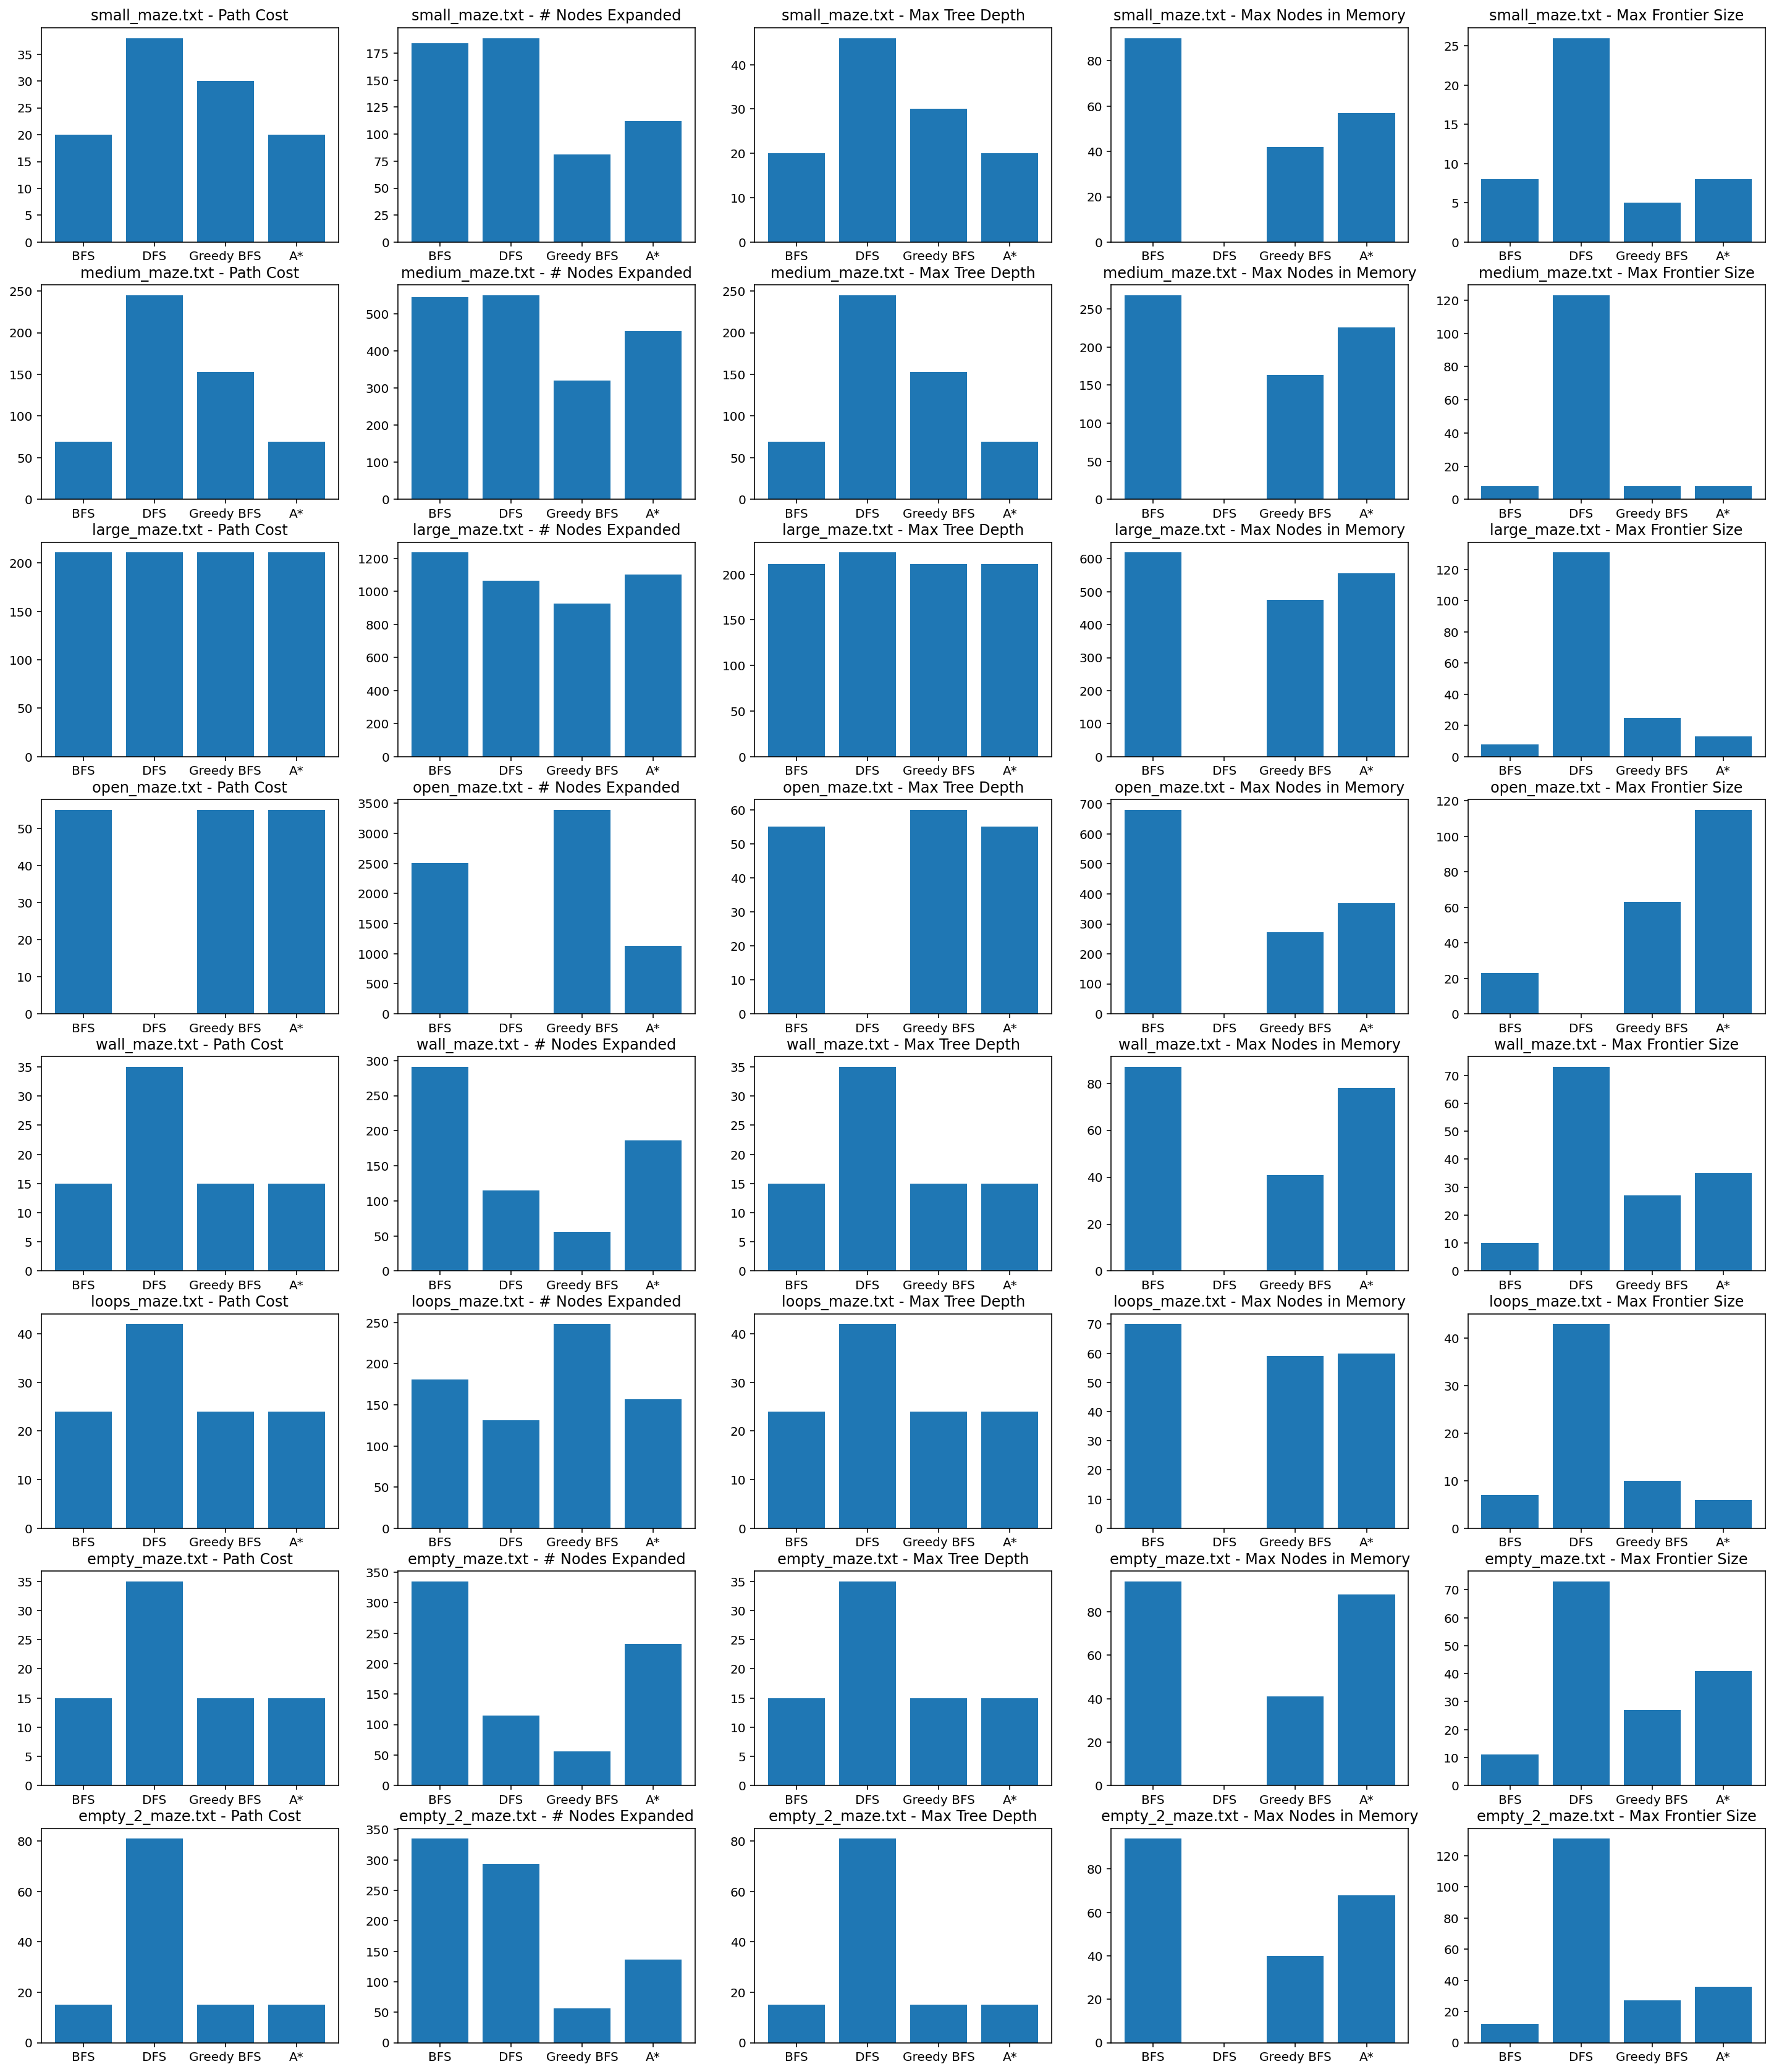

In [98]:
import matplotlib.pyplot as plt

# Add charts
maze_files = ["small_maze.txt","medium_maze.txt","large_maze.txt",
              "open_maze.txt","wall_maze.txt","loops_maze.txt",
              "empty_maze.txt","empty_2_maze.txt"]
search_algos = [bfs, dfs, greedy_bfs, a_star]
metrics_names = ["Path Cost","# Nodes Expanded","Max Tree Depth","Max Nodes in Memory", "Max Frontier Size"]

NUM_MAZES = len(maze_files)
NUM_SEARCH_ALGOS = len(search_algos)
NUM_METRICS = len(metrics_names)

#           Path Cost   # Nodes Expanded    ...
# Maze 1    (Algos)     (Algos)
# Maze 2
# 

fig, axs = plt.subplots(NUM_MAZES, NUM_METRICS)
fig.set_size_inches(25, 30)

for i in range(NUM_MAZES):

    # Open and read the current maze.
    f = open(maze_files[i], "r")
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

    metrics = {
        "BFS" : search_runner(maze, bfs),
        "DFS" : search_runner(maze, dfs),
        "Greedy BFS" : search_runner(maze, greedy_bfs),
        "A*" : search_runner(maze, a_star)
    }

    # Starting at 1 to avoid the Node that is returned by 
    for j in range(1, NUM_METRICS + 1):

        algo_metrics = [metrics["BFS"][j], metrics["DFS"][j], 
                        metrics["Greedy BFS"][j], metrics["A*"][j]]

        axs[i,j-1].bar(metrics.keys(), algo_metrics)
        axs[i,j-1].set_title(maze_files[i]+" - "+metrics_names[j-1])

Discuss the most important lessons you have learned from implementing the different search strategies. 

### Add discussion
1. Search Algorithm implementation: I learned how the difference between these search strategies relies mostly on how the frontiers expand, and how the frontiers expand relies on which data structure is used to represent the frontier. In BFS, we expand all nodes in a level (FIFO Queue approach) before expanding the nodes created in the level below. In DFS, we expand a single child node from a given "root" and continually expand before moving on to any other child node from the root (LIFO Queue approach). And in Greedy BFS and A*, we expand all nodes based on an informed heuristic value dependent on a node's relationship to the goal, and path cost (Priority queue approach).
2. Data Analysis: BFS, Greedy BFS, and A* perform identically with regards to Path Cost of the solution, Max Tree Depth. This means that in practice, Greedy BFS was able to find the optimal solution in most cases (only cases in which it did not were small_maze.txt and medium_maze.txt). Since Greedy BFS tended to store less nodes in memory than either BFS or A*, Greedy BFS may be a good solution to use in large search spaces in place of either BFS or A*.
3. On DFS: There is a price to pay for achieving linear time complexity. Often times DFS expands way more nodes and creates a tree with much greater depth than any other search algorithm. 
4. On BFS: BFS tends to store the most amount of nodes in memory. This is because BFS expands nodes the "slowest" -- that is to say, it "takes it's time" expanding all paths before traversing too far down any one path. Indeed, BFS consistently expands the most nodes and stores the largest max number of nodes in memory.
5. Overall, I did not notice any outrageous outliers or anomalies with respect to the data. All 4 algorithms for a given metric tended to contain the same number of digits (i.e. were measured on a similar scale). I was slightly surprised by this, but maybe differences would be exacerbated with a larger state space.

## Graduate student advanced task: Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [18]:
# Your code/answer goes here

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [19]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [20]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [21]:
# Your code/answer goes here